<a href="https://colab.research.google.com/github/alexziweiwang/ALgo_CV_MW/blob/main/trained_polygon_v00113_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#clone YOLOv5-Polygon and 
!git clone https://github.com/XinzeLee/PolygonObjectDetection.git  # clone repo
%cd PolygonObjectDetection/polygon-yolov5
# install python package requirements
%pip install -r requirements.txt
import torch

# install CUDA extensions
%cd utils/iou_cuda
!python setup.py install
# cd back to polygon-yolov5 folder
%cd .. 
%cd ..



Cloning into 'PolygonObjectDetection'...
remote: Enumerating objects: 517, done.
remote: Total 517 (delta 0), reused 0 (delta 0), pack-reused 517
Receiving objects: 100% (517/517), 122.95 MiB | 32.55 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/PolygonObjectDetection/polygon-yolov5
     |████████████████████████████████| 596 kB 7.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
/content/PolygonObjectDetection/polygon-yolov5/utils/iou_cuda
running install
running bdist_egg
running egg_info
creating polygon_inter_union_cuda.egg-info
writing polygon_inter_union_cuda.egg-info/PKG-INFO
writing dependency_links to polygon_inter_union_cuda.egg-info/dependency_links.txt
writing requirements to polygon_inter_union_cuda.egg-info/requires.txt
writing top-level names to polygon_inter_union_cuda.egg-info/top_level.txt
writing manifest file 'polygon_inter_union_cuda.egg-info/S

# New Section

In [4]:
%pwd
%ls

data/       models/            Polygon-Tutorial1.ipynb  test.py
detect.py   polygon_detect.py  Polygon-Tutorial2.ipynb  train.py
hubconf.py  polygon_test.py    polygon-yolov5s-ucas.pt  utils/
LICENSE     polygon_train.py   requirements.txt         weights/


In [1]:
!pip install roboflow


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="j9VAmUrVlWGFuNsdj9Lb")
project = rf.workspace("cs5800").project("data_set_syringe")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Data_set_Syringe-2 in yolov5pytorch:: 100%|██████████| 1696/1696 [00:00<00:00, 1719.88it/s]


In [3]:

# download dataset zip
#torch.hub.download_url_to_file('https://drive.google.com/uc?export=download&id=1CLDmAKwKobKnvdYJn6RNnw3KUvab6spV', 'tmp.zip')
#!unzip -q tmp.zip -d datasets && rm tmp.zip
%pwd
%ls

Data_set_Syringe-2/  PolygonObjectDetection/  sample_data/


In [14]:
%pwd
%cd PolygonObjectDetection/polygon-yolov5

/content/PolygonObjectDetection/polygon-yolov5


In [5]:
%pwd

'/content/PolygonObjectDetection/polygon-yolov5'

In [10]:
%cd ..

/content/PolygonObjectDetection


In [11]:
%cd ..

/content


In [12]:
%pwd

'/content'

# New Section

# before training, change common.py and train.py


In [17]:
!python train.py --img 640 --batch 16 --epochs 300  --data Data_set_Syringe-2/data.yaml  --cache

YOLOv5 🚀 v1.0-24-gd5926bb torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='models/yolov5s.yaml', data='Data_set_Syringe-2/data.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp5', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0

In [18]:
%pwd

'/content/PolygonObjectDetection/polygon-yolov5'

300 epochs completed in 0.939 hours.

in

runs/train/exp5/weights/best.pt, 14.4MB

In [19]:
!python detect.py --weights runs/train/exp5/weights/best.pt --img 640 --conf 0.1 --source Data_set_Syringe-2/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='Data_set_Syringe-2/test/images', update=False, view_img=False, weights=['runs/train/exp5/weights/best.pt'])
YOLOv5 🚀 v1.0-24-gd5926bb torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
image 1/117 /content/PolygonObjectDetection/polygon-yolov5/Data_set_Syringe-2/test/images/09FQ9VC1

Results saved to runs/detect/exp


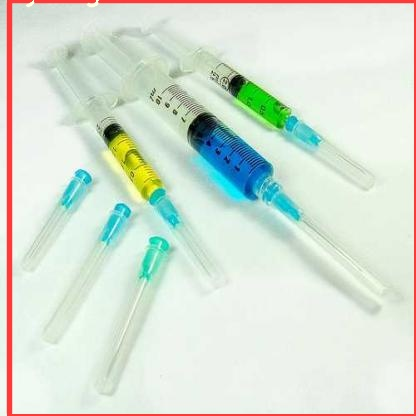

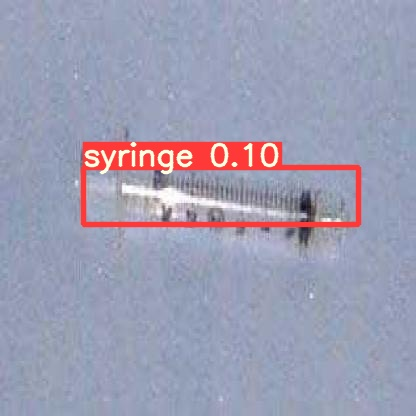

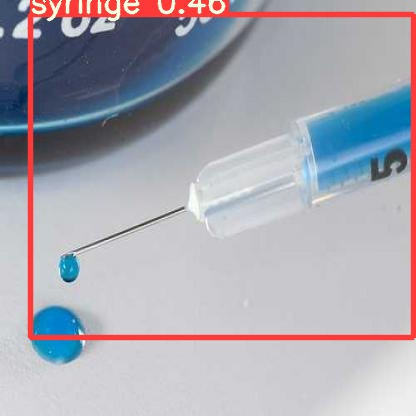

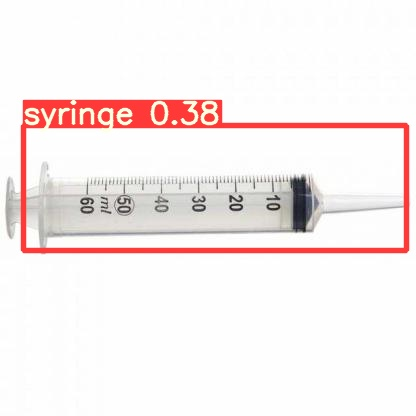

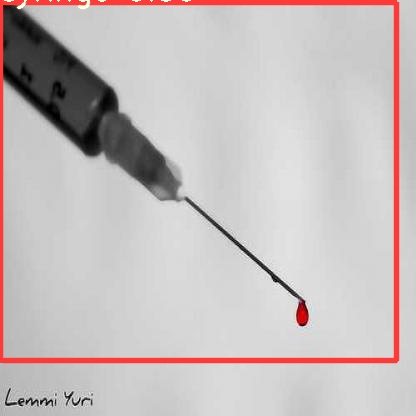

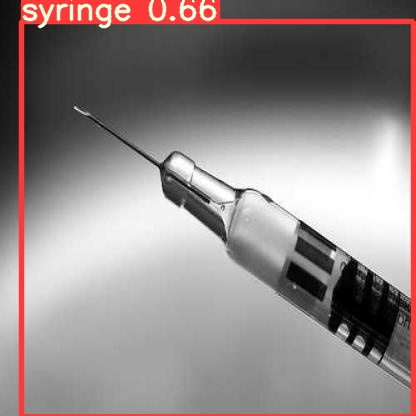

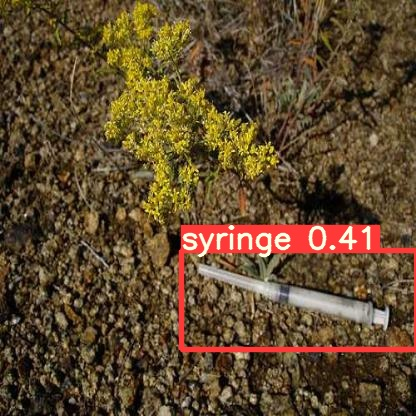

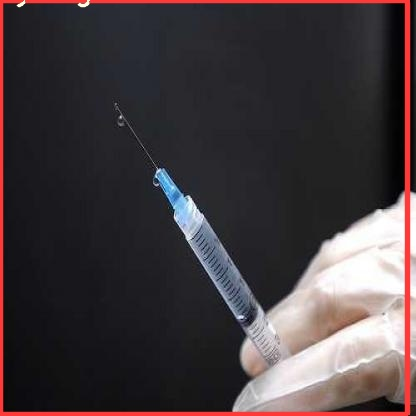

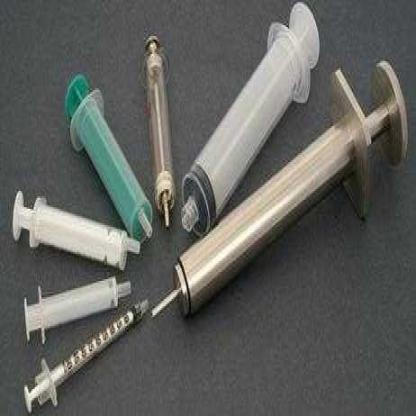

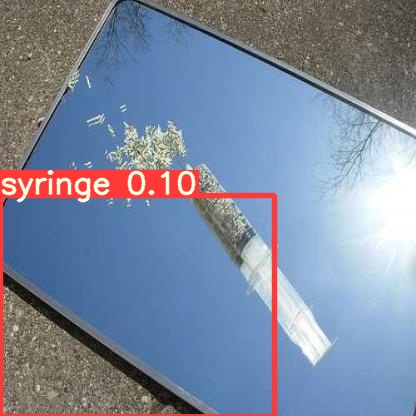

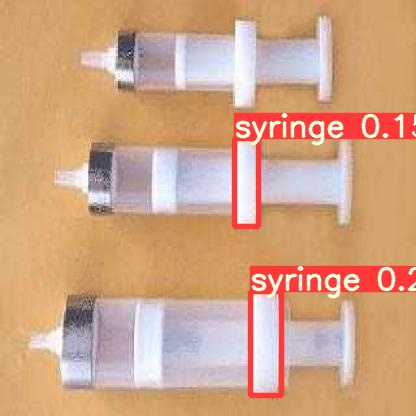

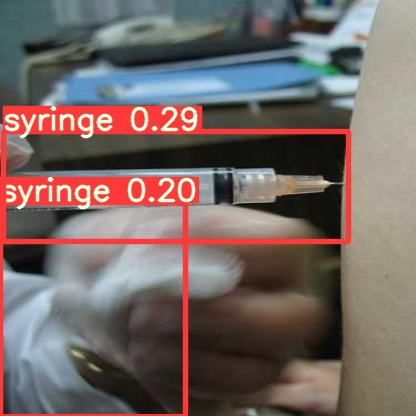

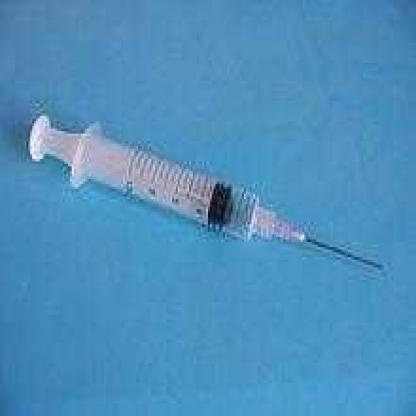

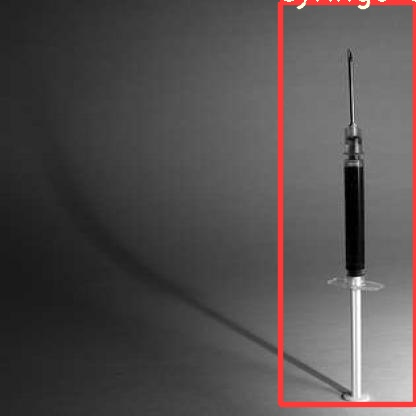

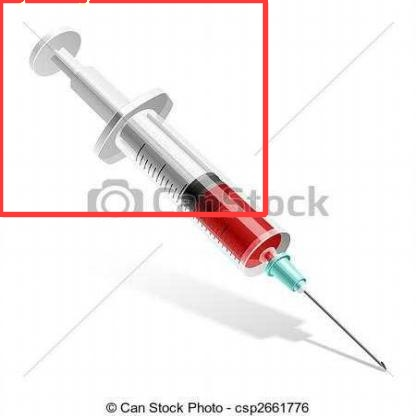

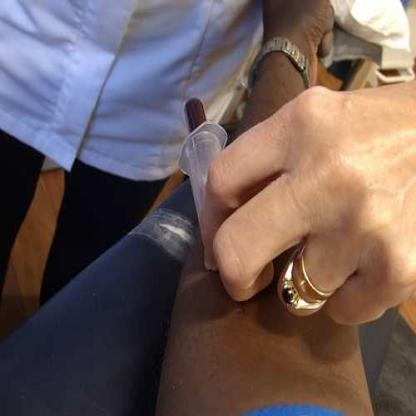

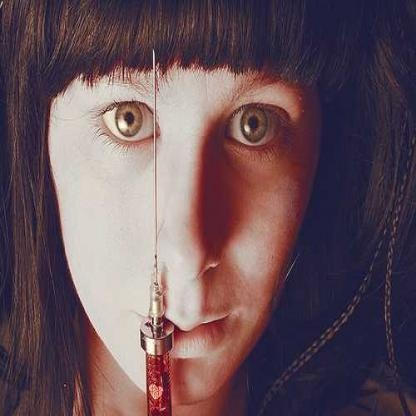

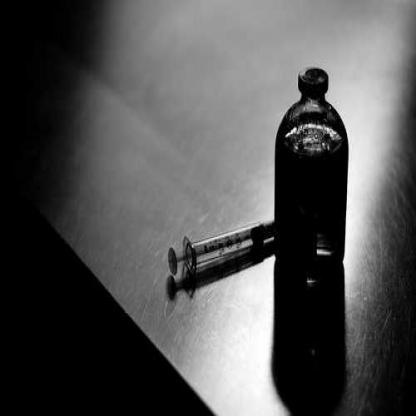

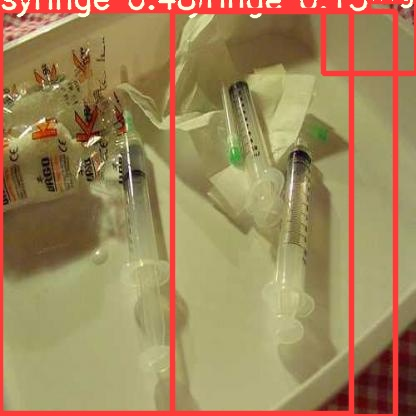

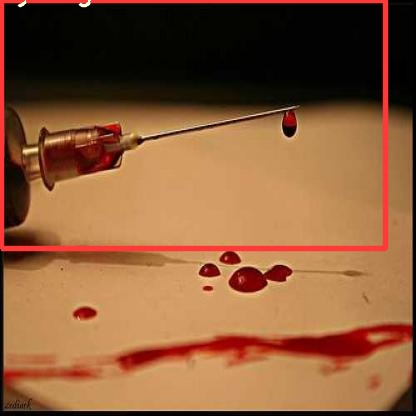

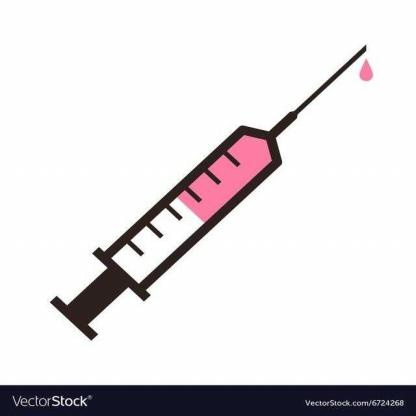

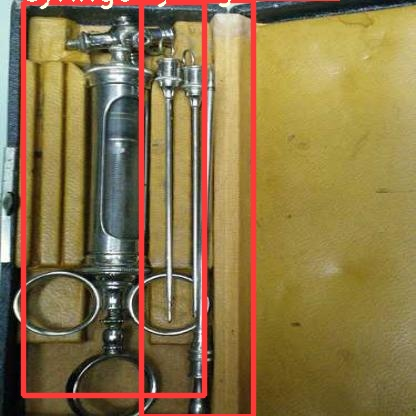

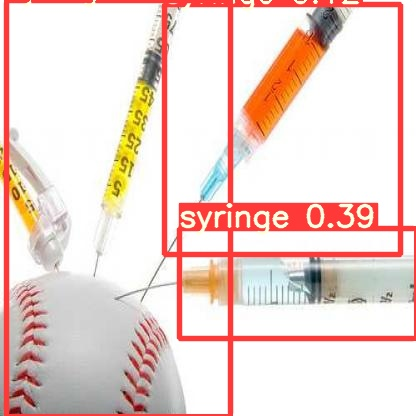

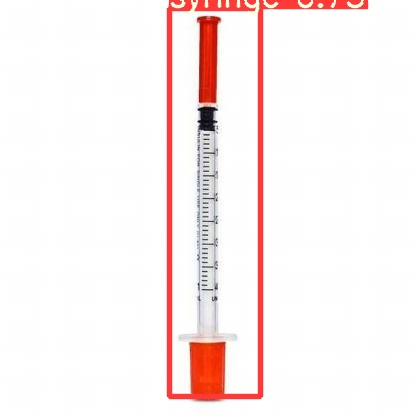

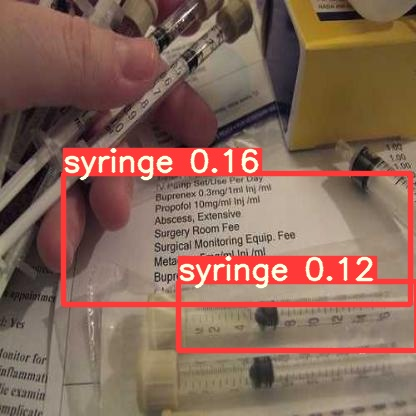

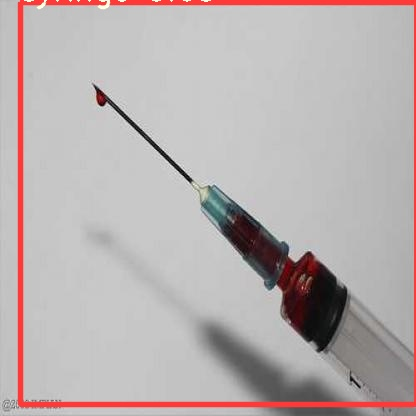

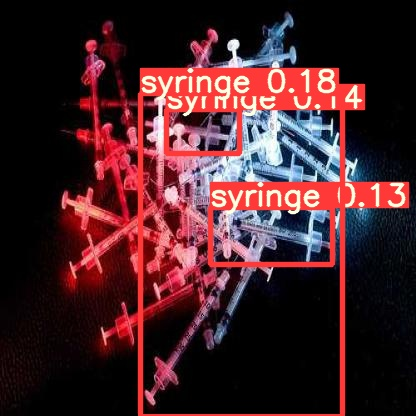

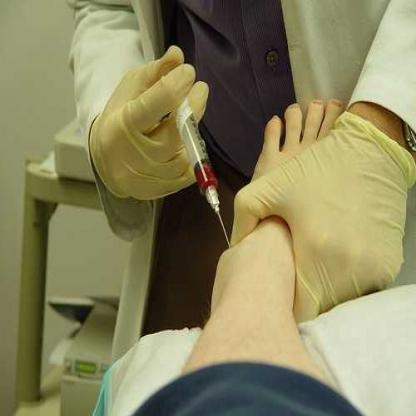

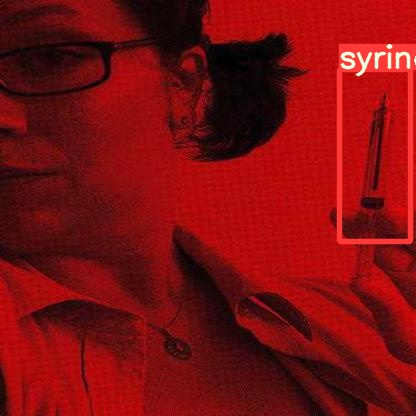

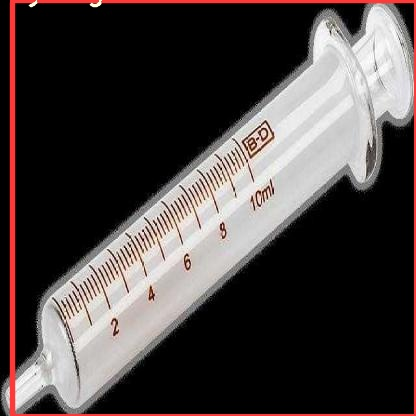

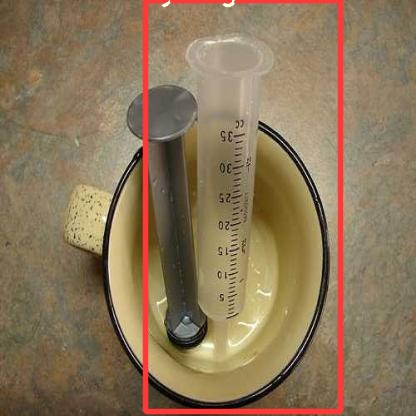

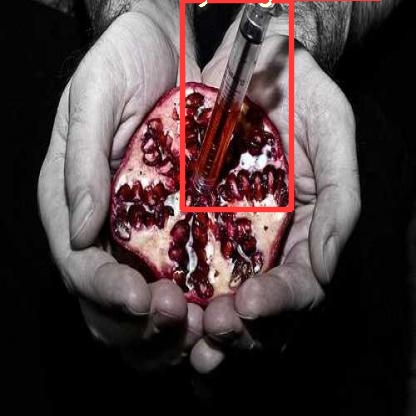

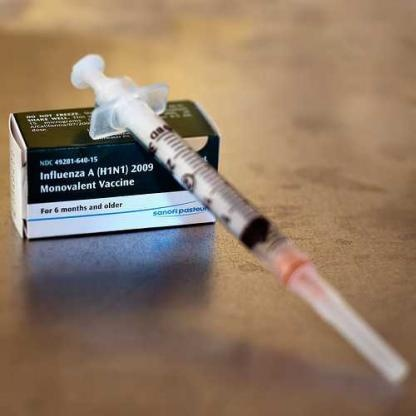

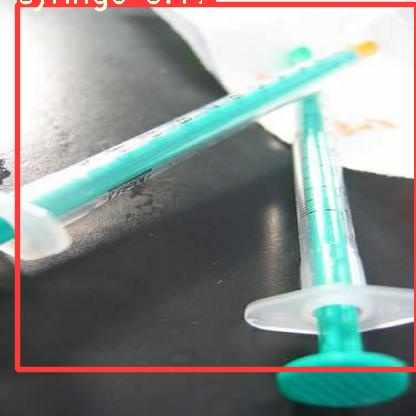

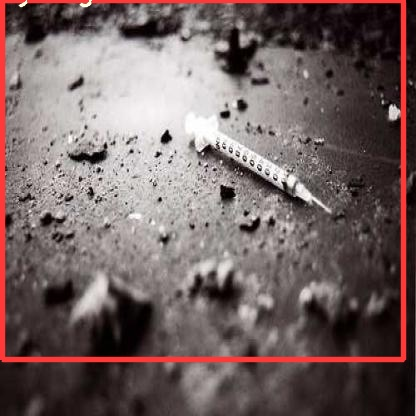

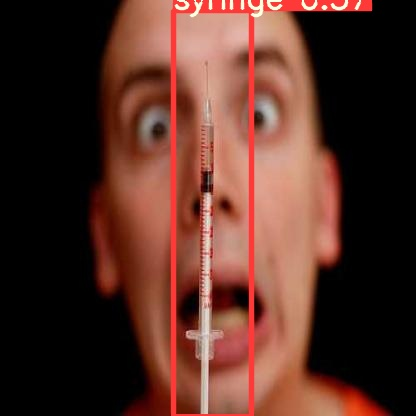

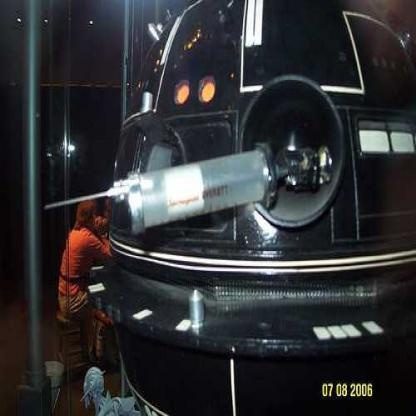

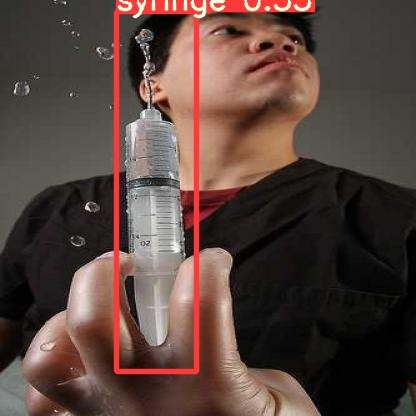

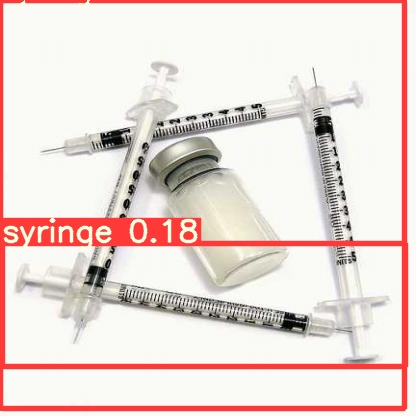

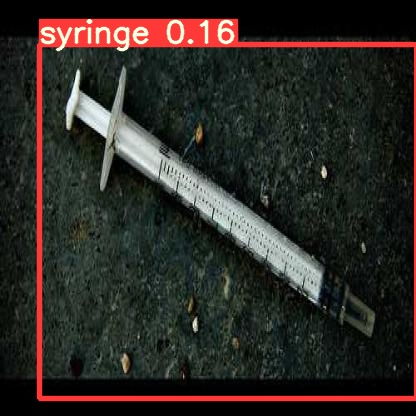

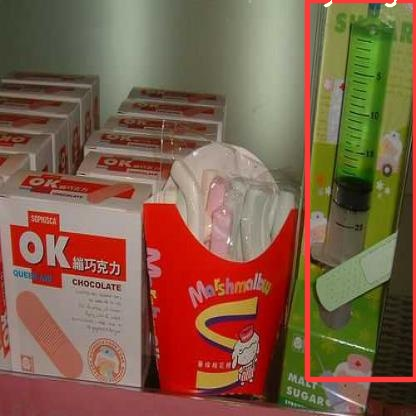

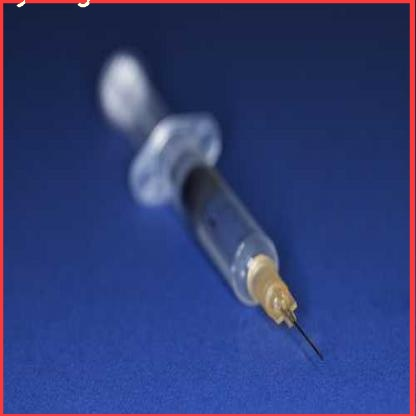

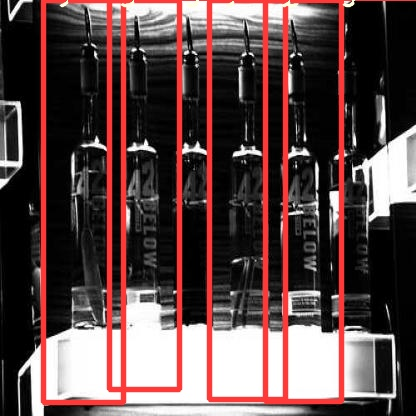

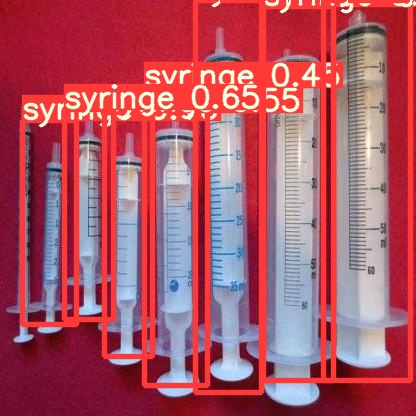

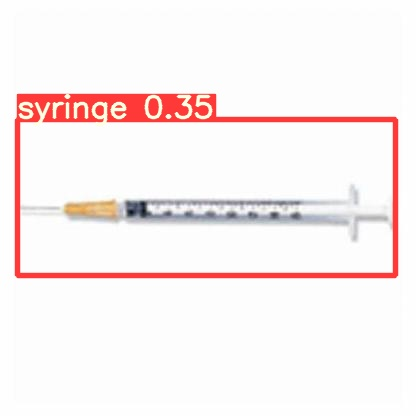

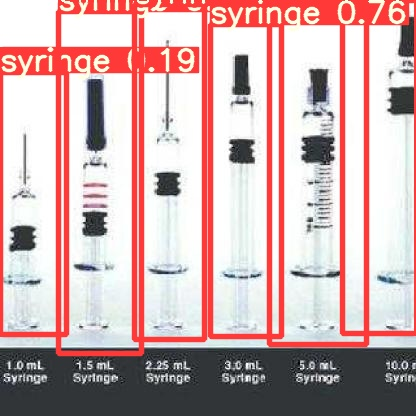

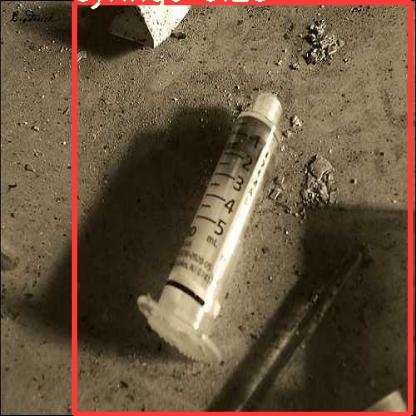

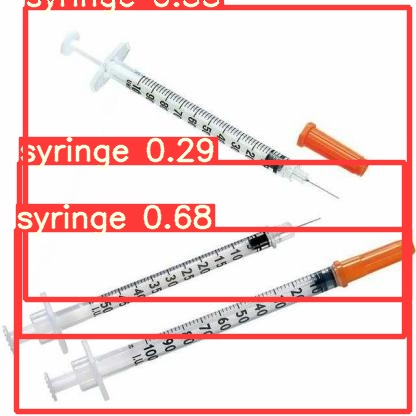

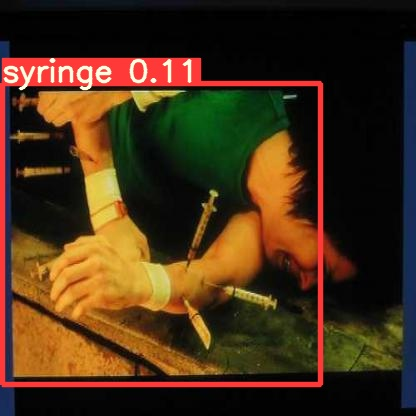

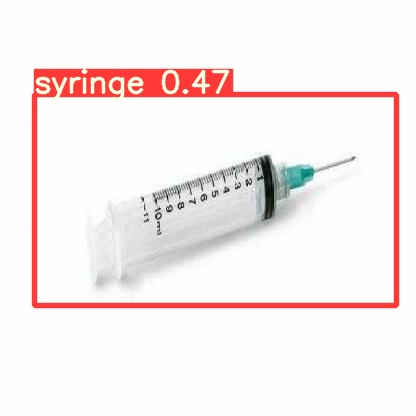

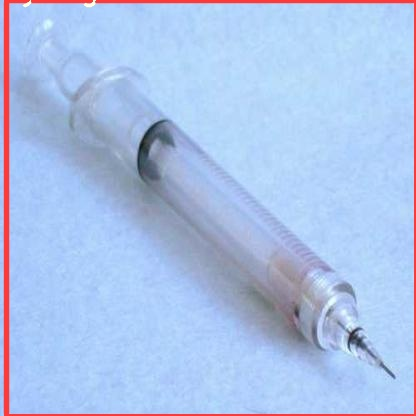

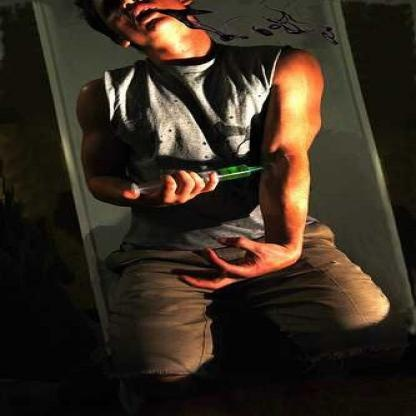

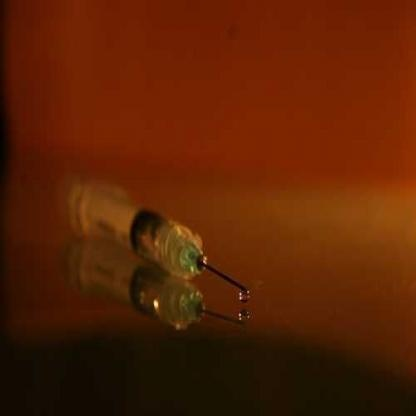

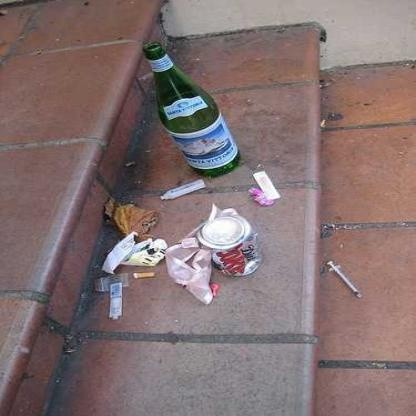

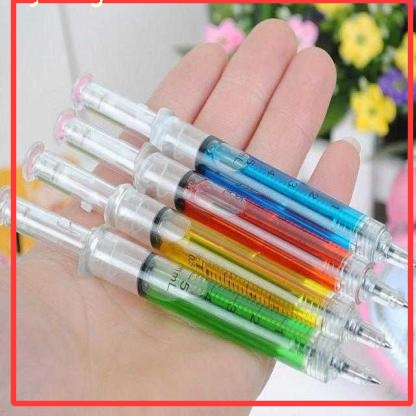

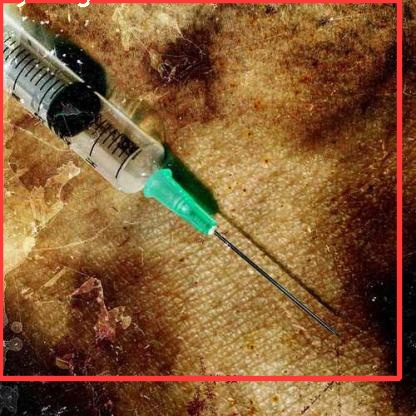

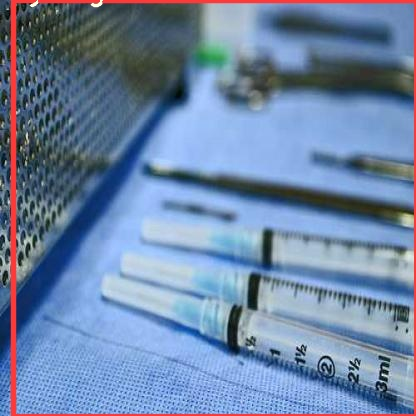

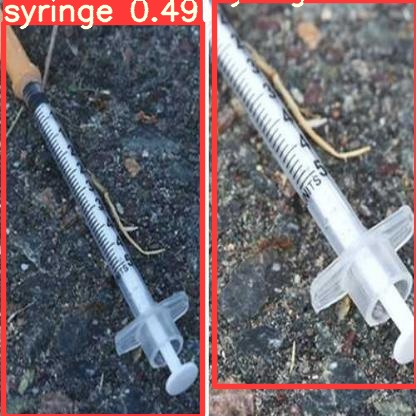

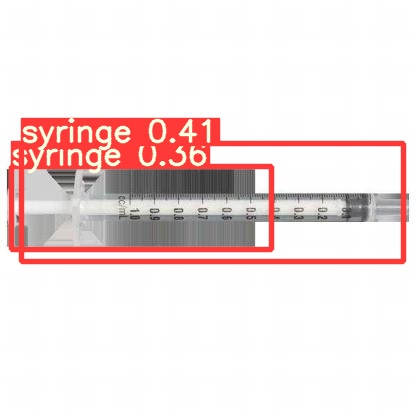

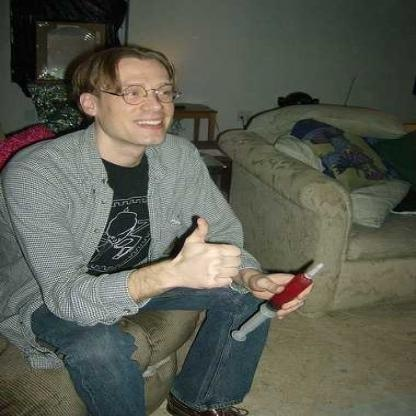

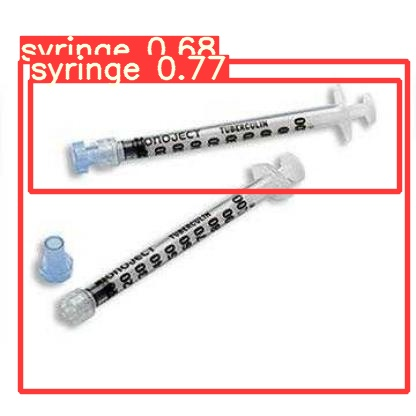

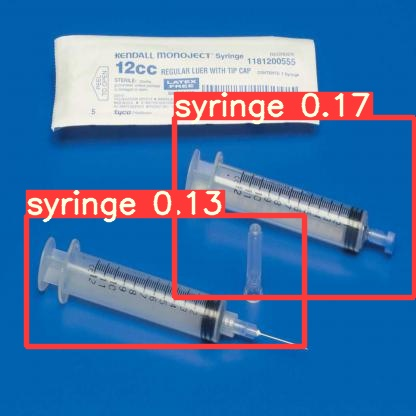

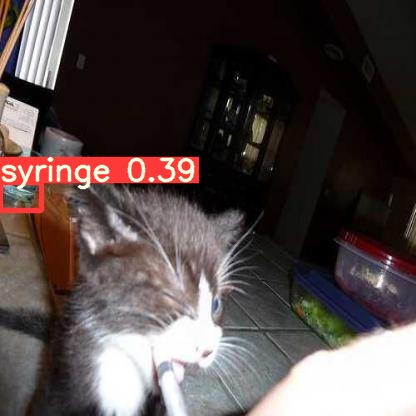

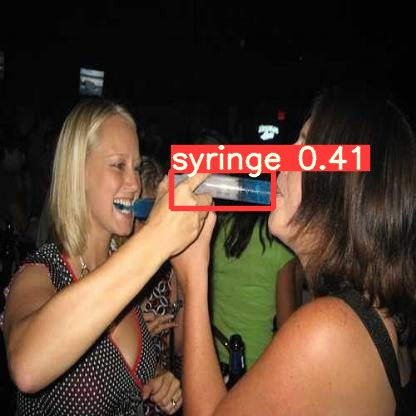

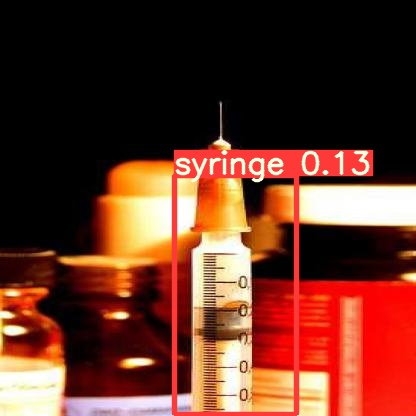

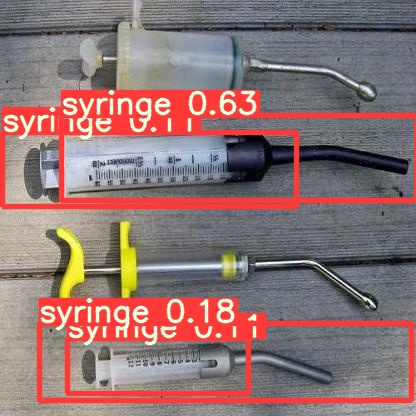

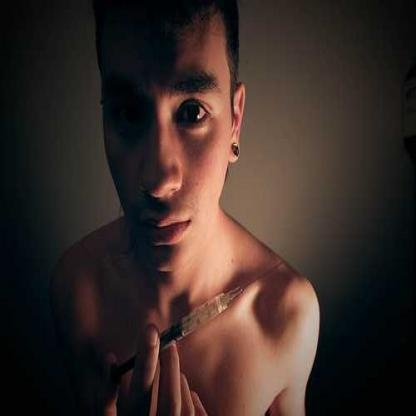

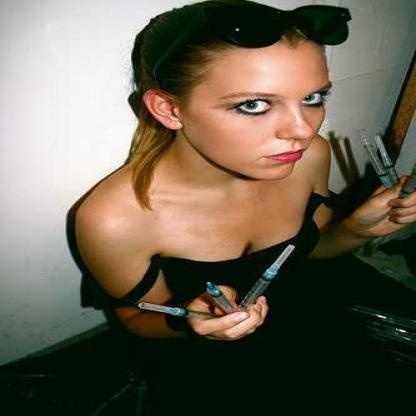

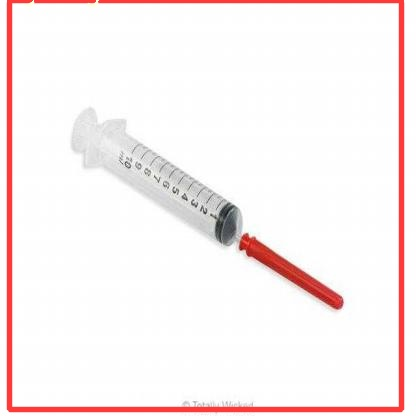

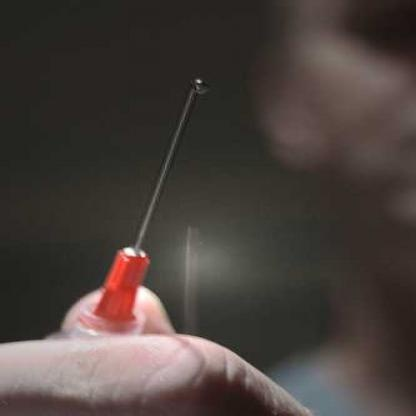

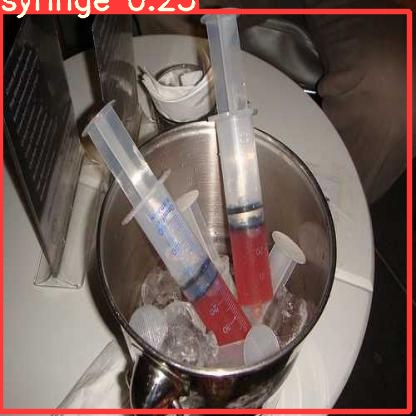

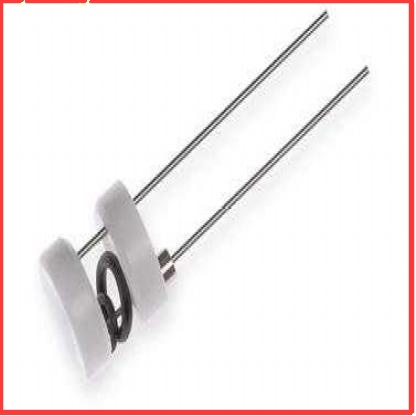

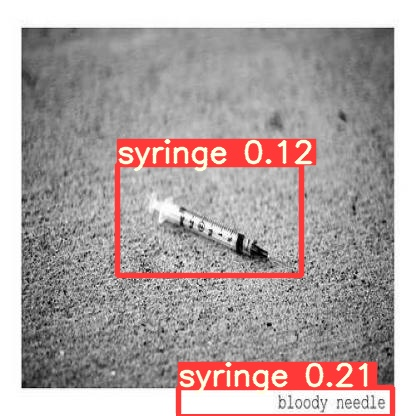

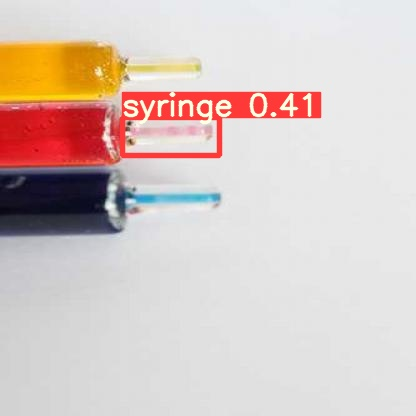

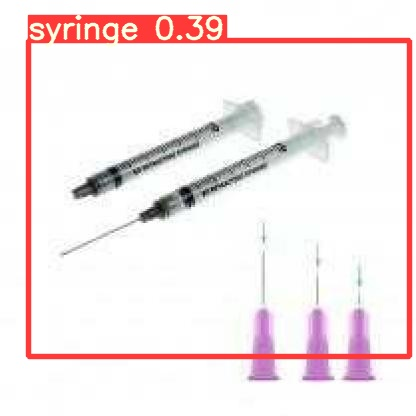

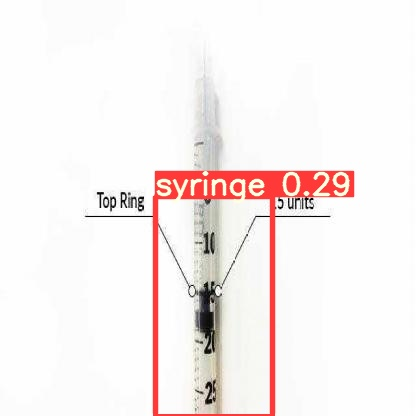

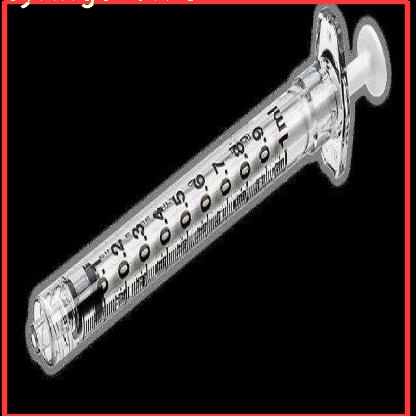

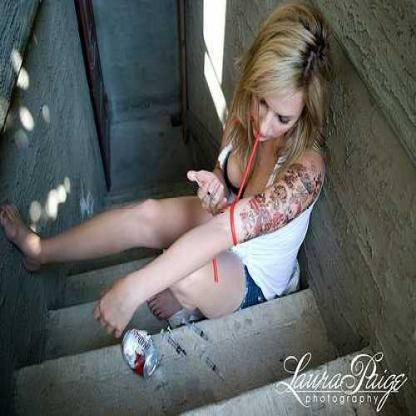

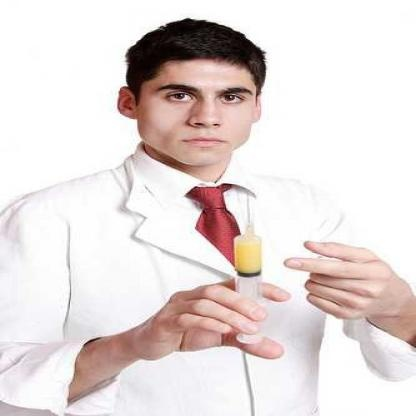

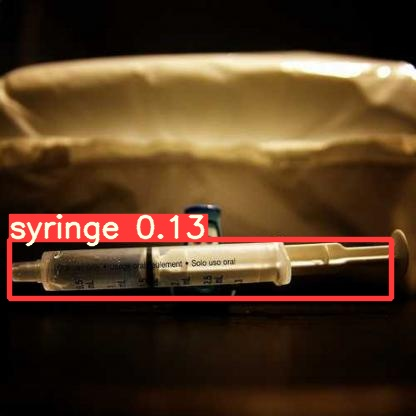

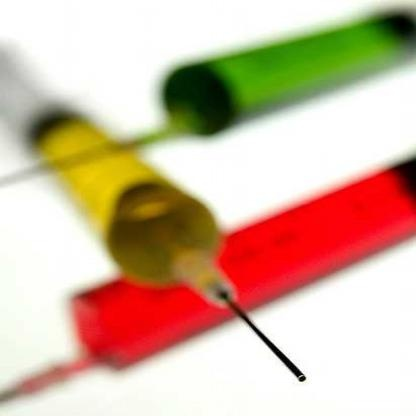

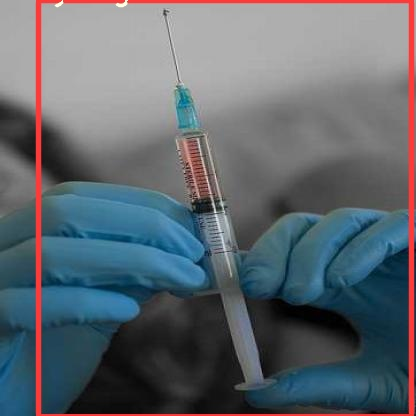

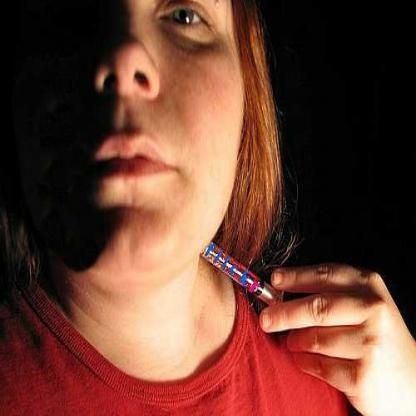

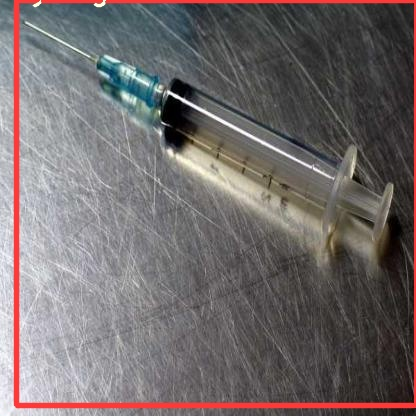

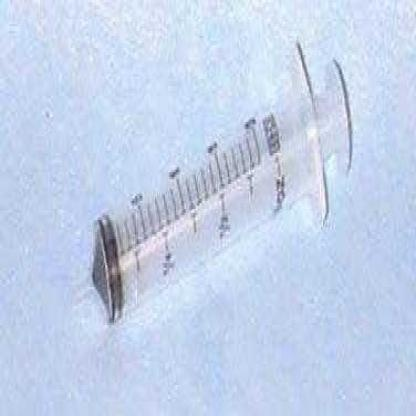

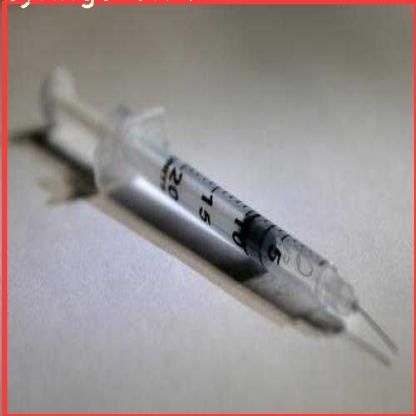

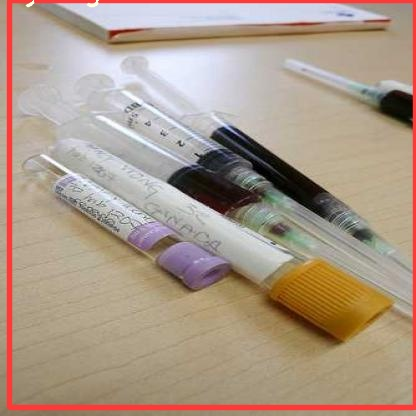

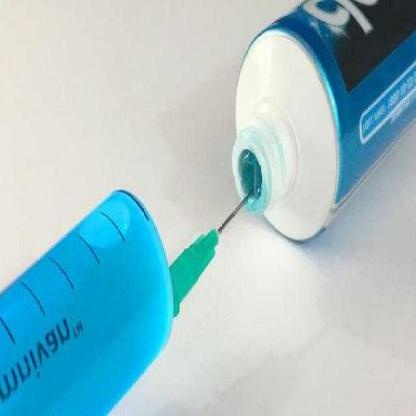

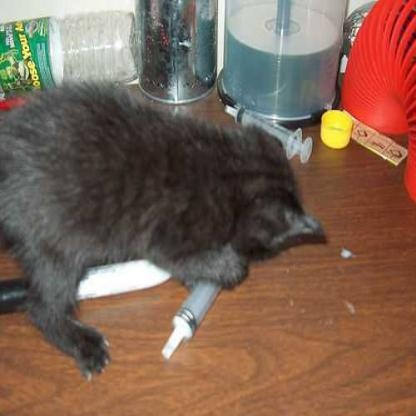

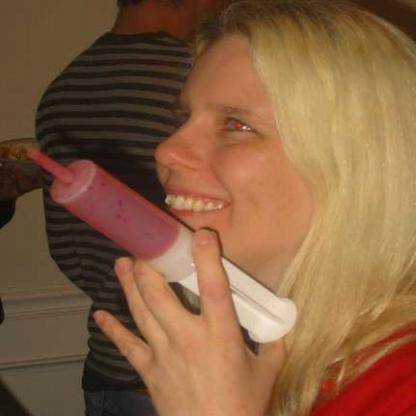

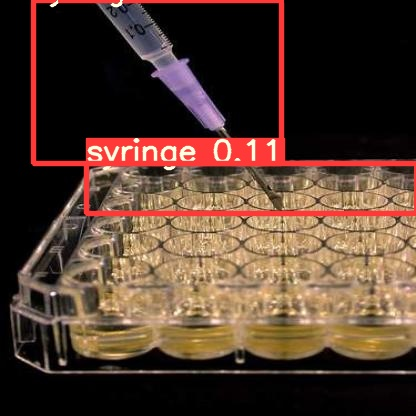

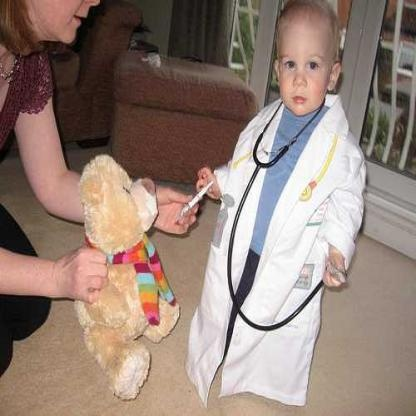

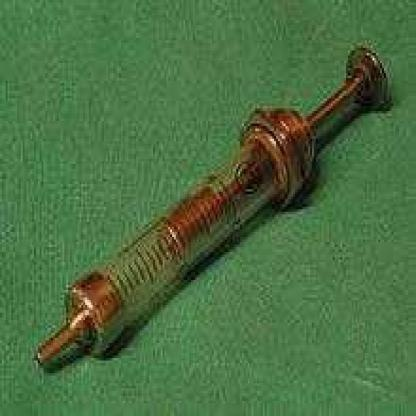

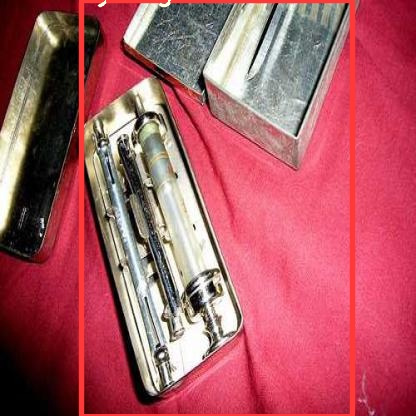

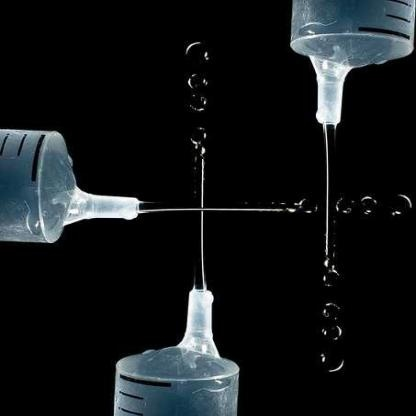

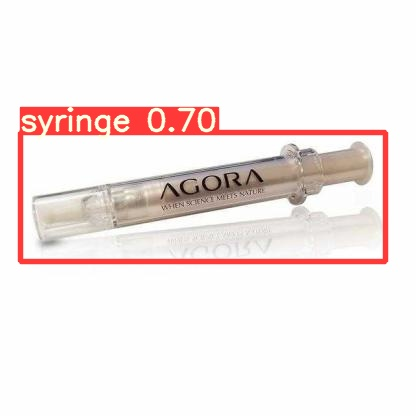

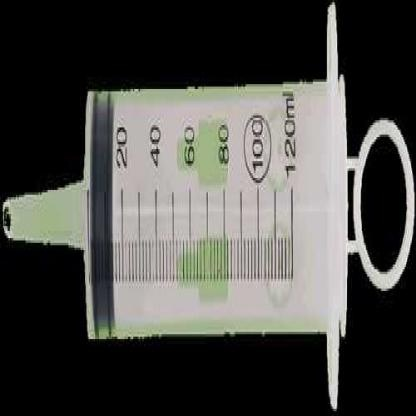

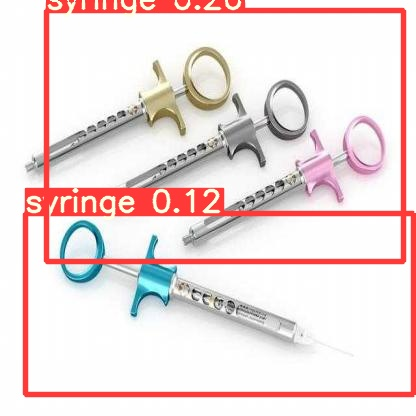

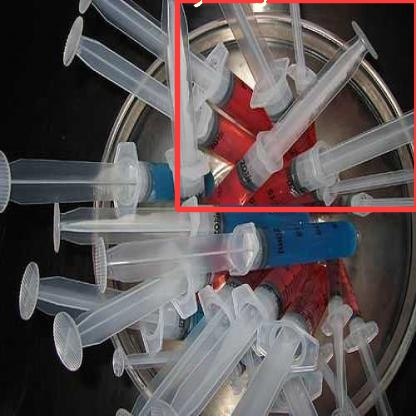

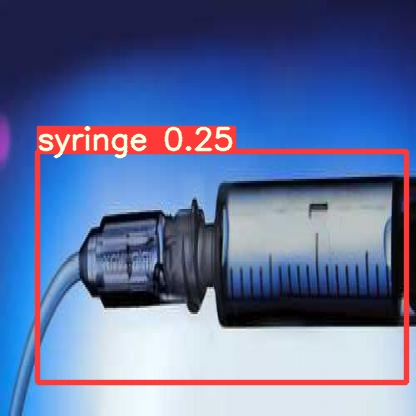

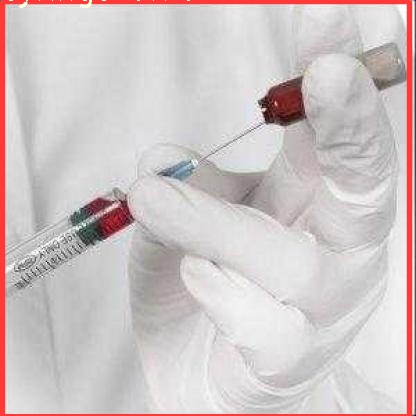

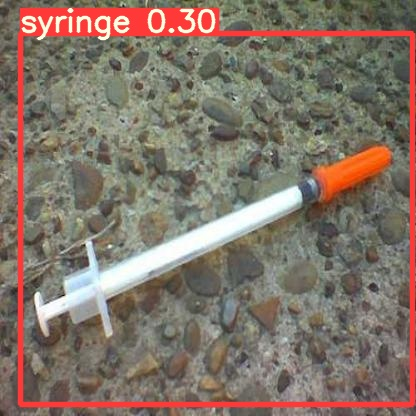

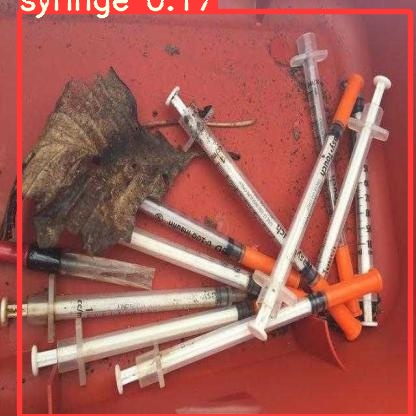

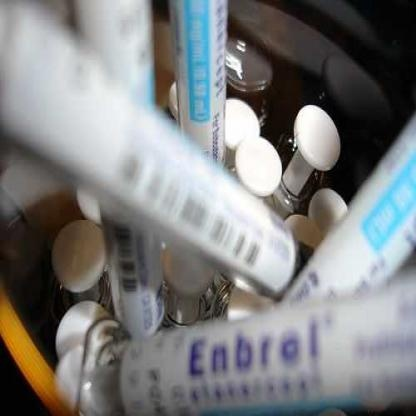

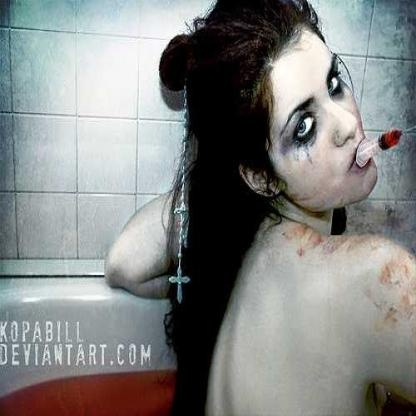

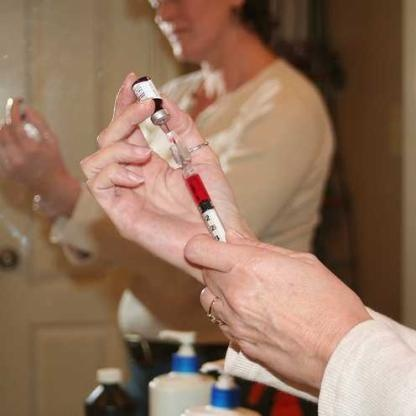

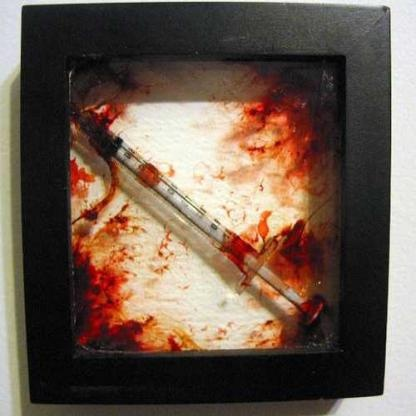

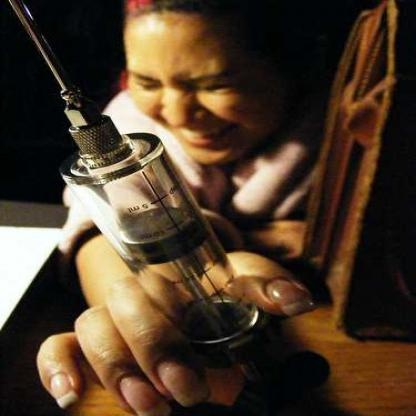

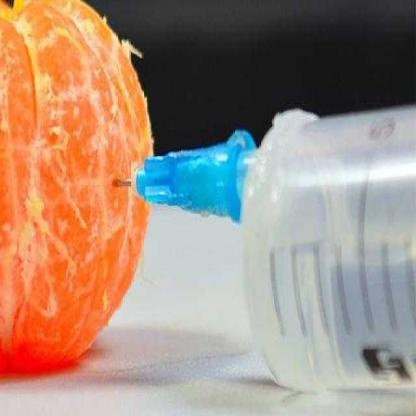

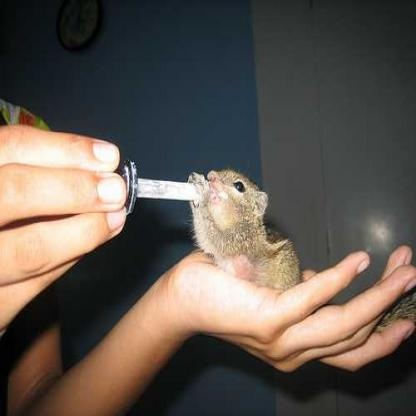

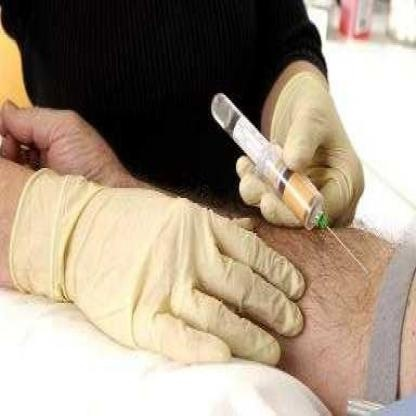

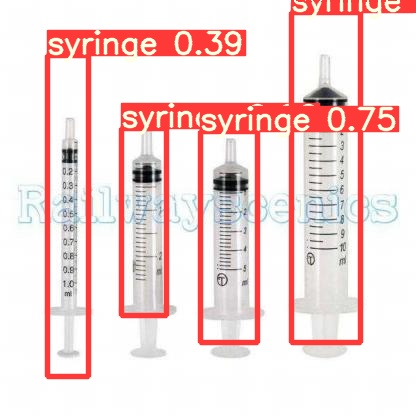

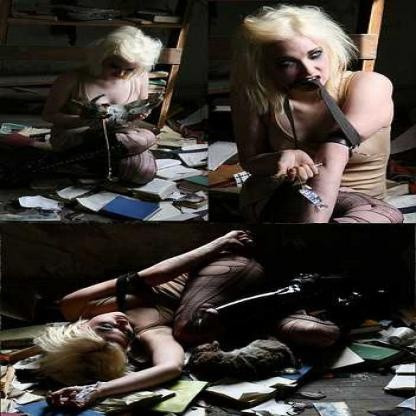

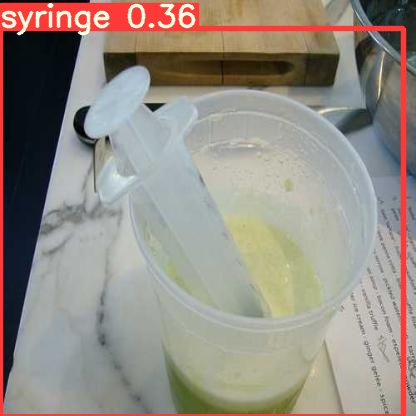

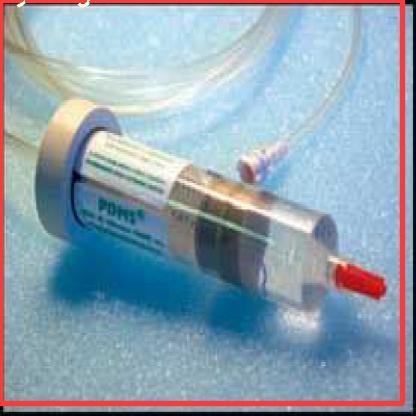

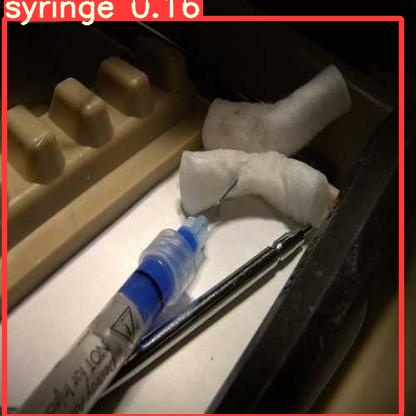

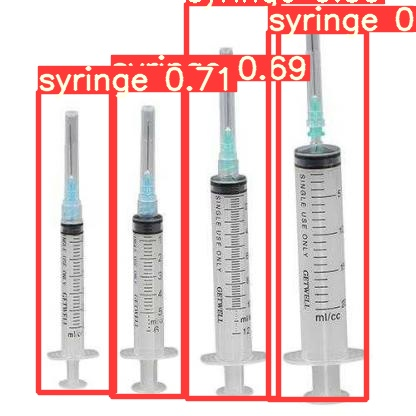

In [23]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/PolygonObjectDetection/polygon-yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")